# Covid19 Exploratory Analysis
## by Tuan Bui

## Preliminary Wrangling

- The main dataset for the 2019 Novel Coronavirus collected and maintained by [Our World in Data](https://ourworldindata.org/coronavirus). It is updated daily and includes data on confirmed cases, deaths, and testing, as well as other variables of potential interest. The dataset is downloaded from https://github.com/owid/covid-19-data/tree/master/public/data
- Dataset contains the number of nurses per 1000 people can be download from the link https://data.worldbank.org/indicator/SH.MED.NUMW.P3?view=chart
- Dataset contains information about GDP growth can be downloaded from the link https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG
- Dataset contains information about the continent of the counties can be downloaded from https://www.kaggle.com/statchaitya/country-to-continent
- Dataset contains information about GDP can be downloaded from https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
from os import path

%matplotlib inline

#### Covid19 dataset

In [2]:
covid19 = pd.read_csv('owid-covid-data.csv')
columns_to_drop = ['total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','tests_units','extreme_poverty','cvd_death_rate','handwashing_facilities']
covid19.drop(columns=columns_to_drop,inplace=True)
covid19.rename(columns={'iso_code':'country_code'},inplace=True)
covid19.date = pd.to_datetime(covid19.date)
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417 entries, 0 to 18416
Data columns (total 21 columns):
country_code                18353 non-null object
location                    18417 non-null object
date                        18417 non-null datetime64[ns]
total_cases                 18417 non-null int64
new_cases                   18417 non-null int64
total_deaths                18417 non-null int64
new_deaths                  18417 non-null int64
total_cases_per_million     18071 non-null float64
new_cases_per_million       18071 non-null float64
total_deaths_per_million    18071 non-null float64
new_deaths_per_million      18071 non-null float64
population                  18353 non-null float64
population_density          17627 non-null float64
median_age                  16794 non-null float64
aged_65_older               16572 non-null float64
aged_70_older               16710 non-null float64
gdp_per_capita              16575 non-null float64
diabetes_prevalence        

#### Number of nurses per 1000 people

In [3]:
nurses = pd.read_csv('nurses.csv',skiprows=3)
nurses.drop(columns=['2019','Unnamed: 64'],inplace=True)
nurses['number_of_nurses'] = nurses[['2013','2014','2015','2016','2017','2018']].fillna(method='ffill',axis=1)['2018']
nurses = nurses[['Country Code','number_of_nurses']]
nurses.rename(columns={'Country Code':'country_code'},inplace=True)
nurses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
country_code        264 non-null object
number_of_nurses    236 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


#### GDP growth rate

In [4]:
gdp_growth_rate = pd.read_csv('gdp_growth_rate.csv',skiprows=3)
gdp_growth_rate.drop(columns=['2019','Unnamed: 64'],inplace=True)
gdp_growth_rate['gdp_growth_rate'] = gdp_growth_rate[['2013','2014','2015','2016','2017','2018']].fillna(method='ffill',axis=1)['2018']
gdp_growth_rate = gdp_growth_rate[['Country Code','gdp_growth_rate']]
gdp_growth_rate.rename(columns={'Country Code':'country_code'},inplace=True)
gdp_growth_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
country_code       264 non-null object
gdp_growth_rate    251 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


#### Continent dataset

In [5]:
continent = pd.read_csv('countryContinent.csv',encoding = "ISO-8859-1")
continent = continent[['code_3','continent','sub_region']]
continent.rename(columns={'code_3':'country_code'},inplace=True)
continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
country_code    249 non-null object
continent       240 non-null object
sub_region      240 non-null object
dtypes: object(3)
memory usage: 5.9+ KB


#### GDP

In [6]:
gdp = pd.read_csv('gdp.csv',skiprows=3)
gdp.drop(columns=['2019','Unnamed: 64'],inplace=True)
gdp['gdp'] = gdp[['2013','2014','2015','2016','2017','2018']].fillna(method='ffill',axis=1)['2018']
gdp = gdp[['Country Code','gdp']]
gdp.rename(columns={'Country Code':'country_code'},inplace=True)
gdp.tail()

country_code           gdp
259          XKX  7.938991e+09
260          YEM  2.691440e+10
261          ZAF  3.682889e+11
262          ZMB  2.672007e+10
263          ZWE  3.100052e+10

#### Master dataset

In [7]:
df = pd.merge(covid19,nurses,how='left',on='country_code')
df = pd.merge(df,gdp_growth_rate,how='left',on = 'country_code')
df = pd.merge(df,gdp,how='left',on = 'country_code')
df = pd.merge(df,continent,how='left',on = 'country_code')
df.to_csv("covid19_master.csv",index=False)
df.sample(10)

country_code      location       date  total_cases  new_cases  \
14824          SAU  Saudi Arabia 2020-04-03         1885        165   
13781          PHL   Philippines 2020-03-28          803         96   
12124          MUS     Mauritius 2020-04-25          331          0   
17141          UKR       Ukraine 2020-04-21         6125        415   
4942           ECU       Ecuador 2020-02-23            0          0   
16978          TWN        Taiwan 2020-05-18          440          0   
13971          POL        Poland 2020-05-19        18885        356   
2915           CAN        Canada 2020-03-25         1959        313   
8833           ITA         Italy 2020-03-08         5883       1247   
6682           GMB        Gambia 2020-04-26           10          0   

       total_deaths  new_deaths  total_cases_per_million  \
14824            21           5                   54.145   
13781            54           9                    7.328   
12124             9           0                  260.268   
17141           161          10                  140.052   
4942              0           0                    0.000   
16978             7           0                   18.474   
13971           936          11                  498.988   
2915             27           3                   51.905   
8833            233          36                   97.301   
6682              1           0                    4.138   

       new_cases_per_million  total_deaths_per_million         ...          \
14824                  4.739                     0.603         ...           
13781                  0.876                     0.493         ...           
12124                  0.000                     7.077         ...           
17141                  9.489                     3.681         ...           
4942                   0.000                     0.000         ...           
16978                  0.000                     0.294         ...           
13971                  9.406                    24.731         ...           
2915                   8.293                     0.715         ...           
8833                  20.625                     3.854         ...           
6682                   0.000                     0.414         ...           

       gdp_per_capita  diabetes_prevalence  female_smokers  male_smokers  \
14824       49045.411                17.72             1.8          25.4   
13781        7599.188                 7.07             7.8          40.8   
12124       20292.745                22.02             3.2          40.7   
17141        7894.393                 7.11            13.5          47.4   
4942        10581.936                 5.55             2.0          12.3   
16978             NaN                  NaN             NaN           NaN   
13971       27216.445                 5.91            23.3          33.1   
2915        44017.591                 7.37            12.0          16.6   
8833        35220.084                 4.78            19.8          27.8   
6682         1561.767                 1.91             0.7          31.2   

       hospital_beds_per_100k  number_of_nurses  gdp_growth_rate  \
14824                    2.70            5.4763         2.434111   
13781                    1.00            4.9351         6.243738   
12124                    3.40            3.5152         3.773819   
17141                    8.80            6.6610         3.335489   
4942                     1.50            2.5059         1.377127   
16978                     NaN               NaN              NaN   
13971                    6.62            6.8926         5.148018   
2915                     2.50            9.9438         1.896975   
8833                     3.18            5.7401         0.774340   
6682                     1.10            1.5447         6.547027   

                gdp  continent          sub_region  
14824  7.865218e+11       Asia        Western Asia  
13781  3.309

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18417 entries, 0 to 18416
Data columns (total 26 columns):
country_code                18353 non-null object
location                    18417 non-null object
date                        18417 non-null datetime64[ns]
total_cases                 18417 non-null int64
new_cases                   18417 non-null int64
total_deaths                18417 non-null int64
new_deaths                  18417 non-null int64
total_cases_per_million     18071 non-null float64
new_cases_per_million       18071 non-null float64
total_deaths_per_million    18071 non-null float64
new_deaths_per_million      18071 non-null float64
population                  18353 non-null float64
population_density          17627 non-null float64
median_age                  16794 non-null float64
aged_65_older               16572 non-null float64
aged_70_older               16710 non-null float64
gdp_per_capita              16575 non-null float64
diabetes_prevalence        

In [9]:
df.continent.unique()

array(['Americas', 'Asia', 'Africa', 'Europe', 'Oceania', nan],
      dtype=object)

In [10]:
df.sub_region.unique()

array(['Caribbean', 'Southern Asia', 'Middle Africa', 'Southern Europe',
       'Western Asia', 'South America', 'Australia and New Zealand',
       'Western Europe', 'Eastern Africa', 'Western Africa',
       'Eastern Europe', 'Central America', 'Northern America',
       'South-Eastern Asia', 'Southern Africa', 'Eastern Asia',
       'Northern Europe', 'Northern Africa', 'Melanesia', 'Micronesia',
       'Central Asia', 'Polynesia', nan], dtype=object)

### What is the structure of your dataset?

The dataset contains 18417 observations with 25 features in which most of them are numeric variables. Some are categorical which are:

- *country_code*: contains the 3-letter code of the country name
- *location*: contains the name of the country or the entity where the observation takes place.
- *continent*: 'Americas', 'Asia', 'Africa', 'Europe', 'Oceania'
- *sub_region*: 'Caribbean', 'Southern Asia', 'Middle Africa', 'Southern Europe','Western Asia', 'South America', 'Australia and New Zealand','Western Europe', 'Eastern Africa', 'Western Africa','Eastern Europe', 'Central America', 'Northern America','South-Eastern Asia', 'Southern Africa', 'Eastern Asia','Northern Europe', 'Northern Africa', 'Melanesia', 'Micronesia', 'Central Asia', 'Polynesia'

### What is/are the main feature(s) of interest in your dataset?

Our main features of interest are: *total_cases_per_million* and *total_deaths_per_million*

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Depends on the features of interest, we think that the expected supporting features are:
- *continent*, 
- *sub_region*,
- *gdp_per_capita*,
- *number_of_nurses*,
- *hospital_beds_per_100k*, 
- *gdp_growth_rate* 


### Sub-datasets

In [11]:
world = df[df.location=='World']
country = df[df.country_code.str.len()==3]
columns_to_keep = ['country_code','location','population_density','aged_65_older','gdp_per_capita','gdp','diabetes_prevalence','hospital_beds_per_100k','number_of_nurses','gdp_growth_rate','continent','sub_region']
country_total = country.groupby(columns_to_keep).agg({'total_cases_per_million':'max','total_deaths_per_million':'max'}).reset_index()
continent_ts = country.groupby(['continent','date']).agg({'total_cases_per_million':'mean','total_deaths_per_million':'mean'}).reset_index()
gdp = pd.merge(gdp,continent,how='left',on='country_code')

## Univariate Exploration

Let's first look at the features *total_cases_per_million* and *total_cases_per_million* between countries. 

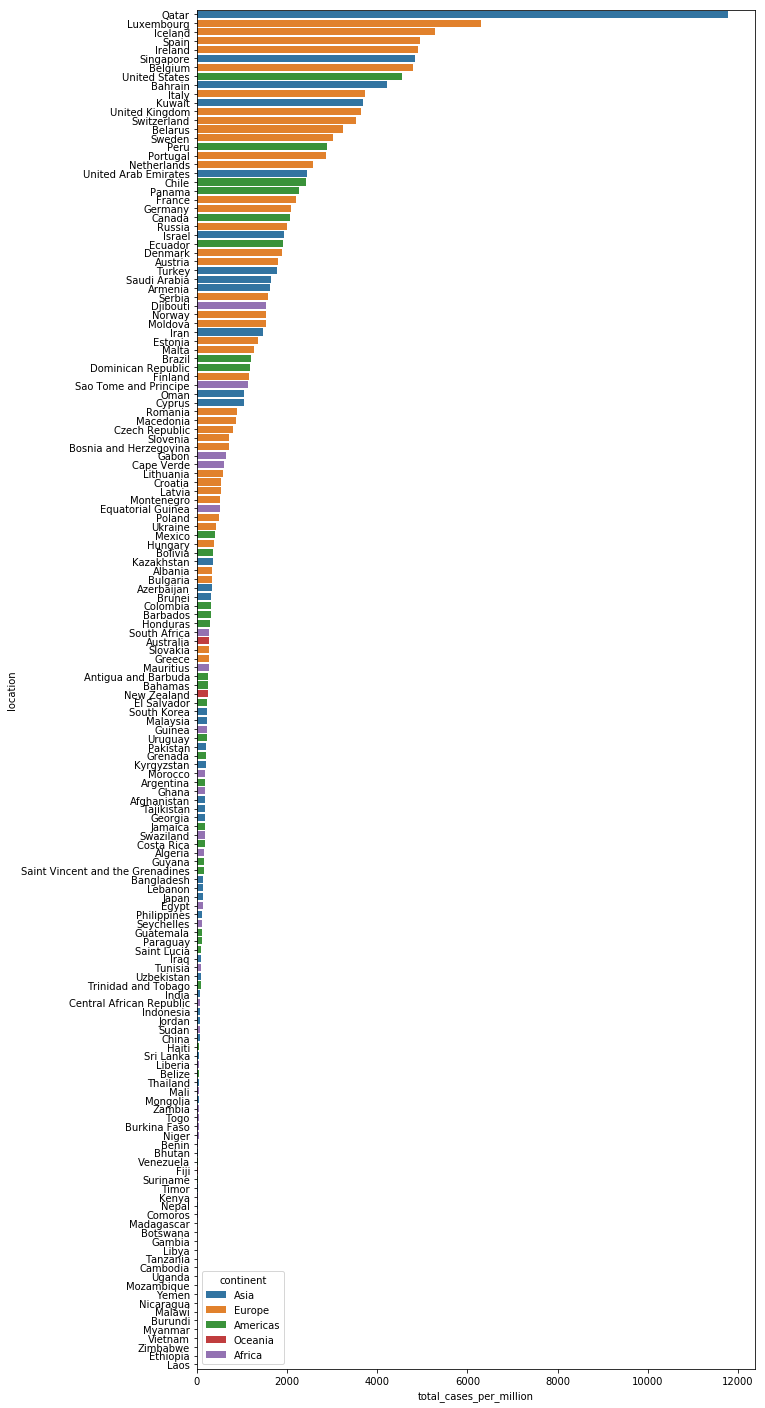

In [12]:
plt.figure(figsize=(10,25))
sort = country_total.sort_values('total_cases_per_million',ascending=False)
ax = sb.barplot(y='location',x='total_cases_per_million',data=country_total,order=sort['location'],hue='continent',dodge=False)


Let's look at the distribution

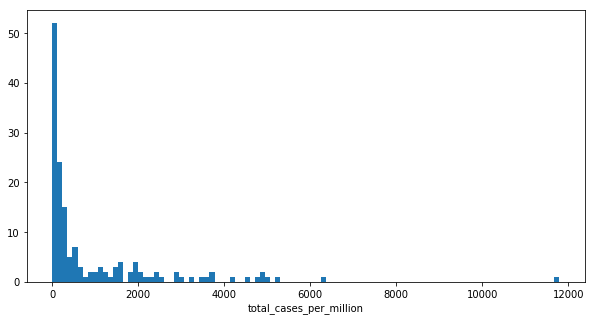

In [13]:
# start with a standard-scaled plot
plt.figure(figsize=[10, 5])
ax = sb.distplot(country_total.total_cases_per_million,bins=100,kde=False,hist_kws = {'alpha':1})

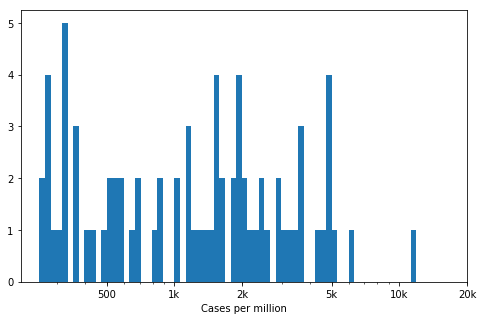

In [14]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(country_total.total_cases_per_million.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = country_total, x = 'total_cases_per_million', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Cases per million')
plt.show()

The distribution of *total_cases_per_million* has a long tail because there is an extreme case which has really high cases per million and by the bar plot it's Quatar. When plotted on log-scale, the plot seems to have no pattern. In this case, the histogram does not tell us much information. So let us observe the features follow the timeline.

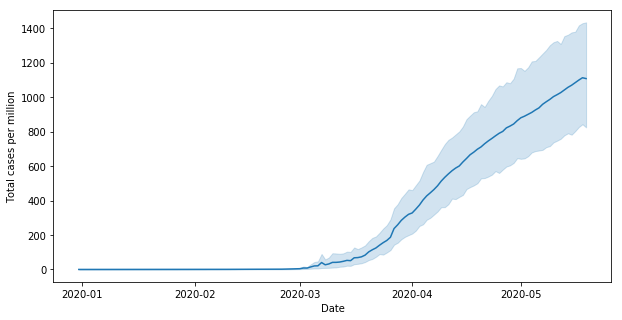

In [15]:
# plot global average of total cases per million with confidence interval
plt.figure(figsize=(10,5))
ax = sb.lineplot(data=country,x='date',y='total_cases_per_million')
plt.xlabel("Date")
plt.ylabel('Total cases per million');


Overall, the number of global cases per million is still increasing and has not a sign of slow down. Also over time, the gap between the country that has highest cases per million and the country that has lowest is increasing as well. This suggests us that maybe the pendemic strikes hard in some countries and has less effect in others. 

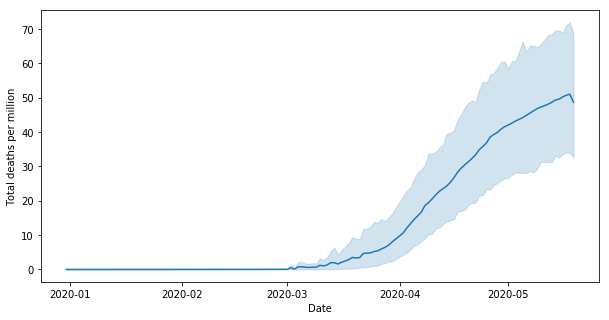

In [16]:
# plot global average of total deaths per million with confidence interval
plt.figure(figsize=(10,5))
ax = sb.lineplot(data=country,x='date',y='total_deaths_per_million')
plt.xlabel("Date")
plt.ylabel('Total deaths per million');

This behaves the same as the number of cases per million and the gap between the highest deaths and lowest deaths is even wider than in the case of number of cases. Deaths per million seems to slow down a bit since the beginning of May. This suggests that it might be because of the hospital facilities and the economics of the country. The features *gdp*, *hospital_beds_per_100k*, *number_of_nurses* may help understand this observation.

Let's first look at *gdp* feature.

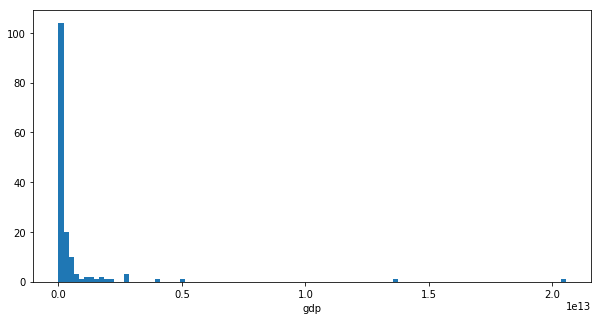

In [17]:
# plot at normal scale
plt.figure(figsize=(10,5))
sb.distplot(country_total.gdp,kde=False,bins=100,hist_kws={'alpha':1})

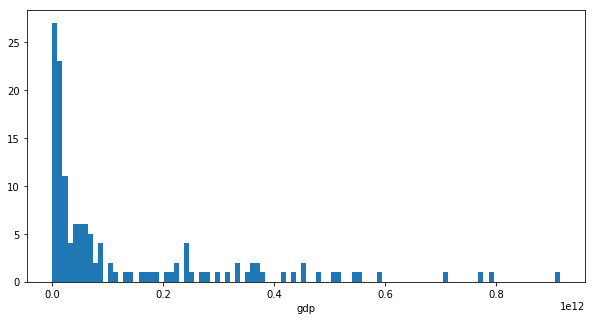

In [18]:
# cut off the extremas and store it in country_cut
plt.figure(figsize=(10,5))
country_cut = country_total[country_total.gdp<10**12]
sb.distplot(country_cut['gdp'],kde=False,bins=100,hist_kws={'alpha':1})

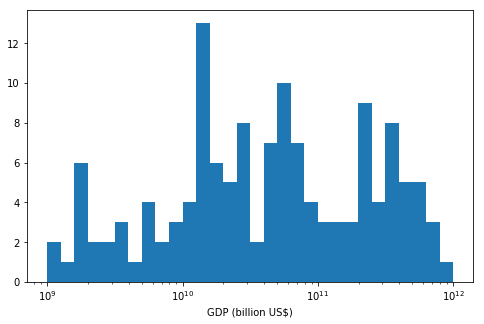

In [19]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(9, np.log10(country_cut.gdp.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = country_cut, x = 'gdp', bins = bins)
plt.xscale('log')
#plt.xticks([1e9, 3e9, 1e10, 3e10, 1e11, 3e11,1e12], [1, '3', '10', '30', '100', '300','1000'])
plt.xlabel('GDP (billion US$)')
plt.show()

It seems that based on *gdp* we can classify countries into 3 categories: rich, average and poor. Now, let's oberse *hospital_beds_per_100k*.

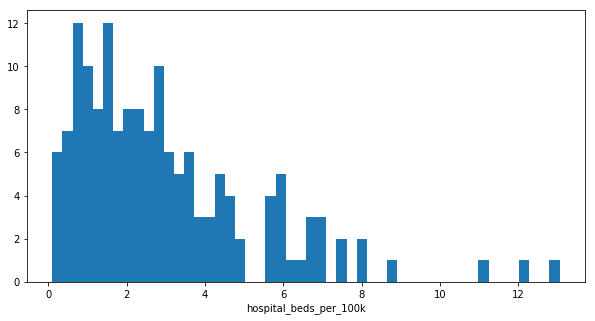

In [20]:
# plot at normal scale
plt.figure(figsize=(10,5))
sb.distplot(country_total.hospital_beds_per_100k,kde=False,bins=50,hist_kws={'alpha':1})

There are a few countries that have very high number of beds per 100k peple. Let's zoom in to densed area

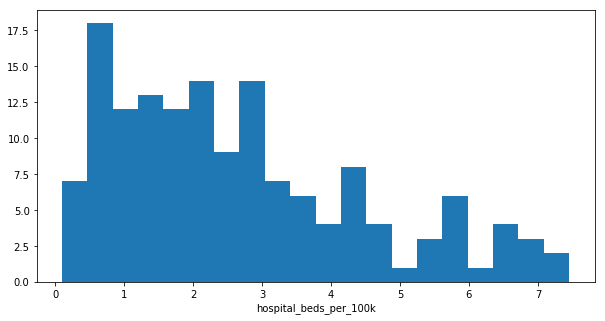

In [21]:
plt.figure(figsize=(10,5))
beds_cut = country_total[country_total.hospital_beds_per_100k<8]['hospital_beds_per_100k']
sb.distplot(beds_cut,kde=False,bins=20,hist_kws={'alpha':1})

So most country have around 1-2 beds per 100 thoundsand people. Let's observe *number_of_nurses* per 1k people.

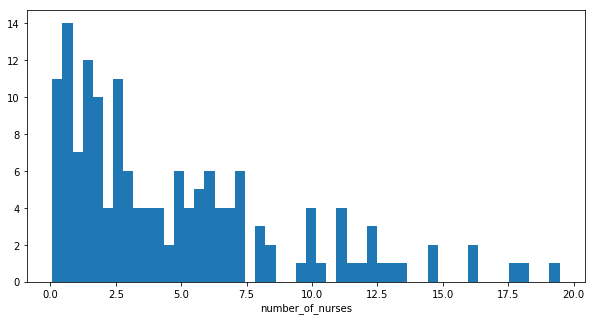

In [22]:
# plot at normal scale
plt.figure(figsize=(10,5))
sb.distplot(country_total.number_of_nurses,kde=False,bins=50,hist_kws={'alpha':1})

Similar to *hospital_beds_per_100k*, *number_of_nurses* per 1k people concentrate in the interval 0-7 nurses per 1k. A few countries have really high as 17-20 nurses per 1k.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The feature *total_cases_per_million* has a wide range with some countries having really high number of cases per million, for instance Quatar has over 12000 cases per million which is extremely high. So we looked at the data using log transform. However, under the transformation, the data seems to have no parttern so we need to observe it in other ways around.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We did more investigation on othe features: 
- For *gdp*, the normal scale histogram plot strong right skewed with a few extreme countries having really high GDP. We cut off those countries and perform the same observation, the resulting plot still strong right skewed. So we performed log transformation, it turns out that we can classify countries into 2 categories: rich, average and poor.
- For *hospital_beds_per_100k* and *number_of_nurses*, both features having plots which strongly right skewed. Zoom in the densed areas we see that both features concentrated in its particular interval. Since the features are not large, we don't perform any transformation.

All of the investigated features are prepared from the beginning.

## Bivariate Exploration


First look at the pairwise correlation between the features.

In [23]:
numeric_vars = ['total_cases_per_million','total_deaths_per_million','population_density','aged_65_older','gdp_per_capita','gdp','gdp_growth_rate','hospital_beds_per_100k','number_of_nurses']
categoric_vars = ['continent','sub_region']

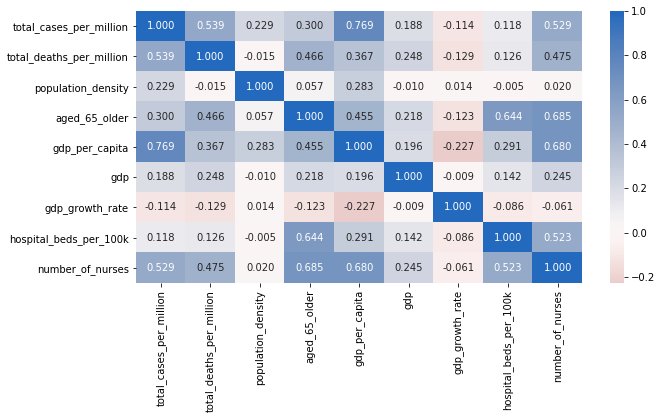

In [24]:
plt.figure(figsize=[10,5])
sb.heatmap(country_total[numeric_vars].corr(),annot=True,fmt = '.3f',cmap='vlag_r',center=0)

There is a mediocre relation between *total_cases_per_million* and *total_deaths_per_million* which is a bit strange since those features should be really accociated. One interesting found is the high positive correlation between *gdp_per_capita* and *total_cases_per_million* and less positve correlated with *total_deaths_per_million*. Perhaps richer countries have more tests so they can find more confirmed cases in the community?

Another interesting observation is the high positive correlation between *aged_65_older* share and *gdp_per_capita* against *number_of_nurses*. This suggests that perhaps richer countries have older population.

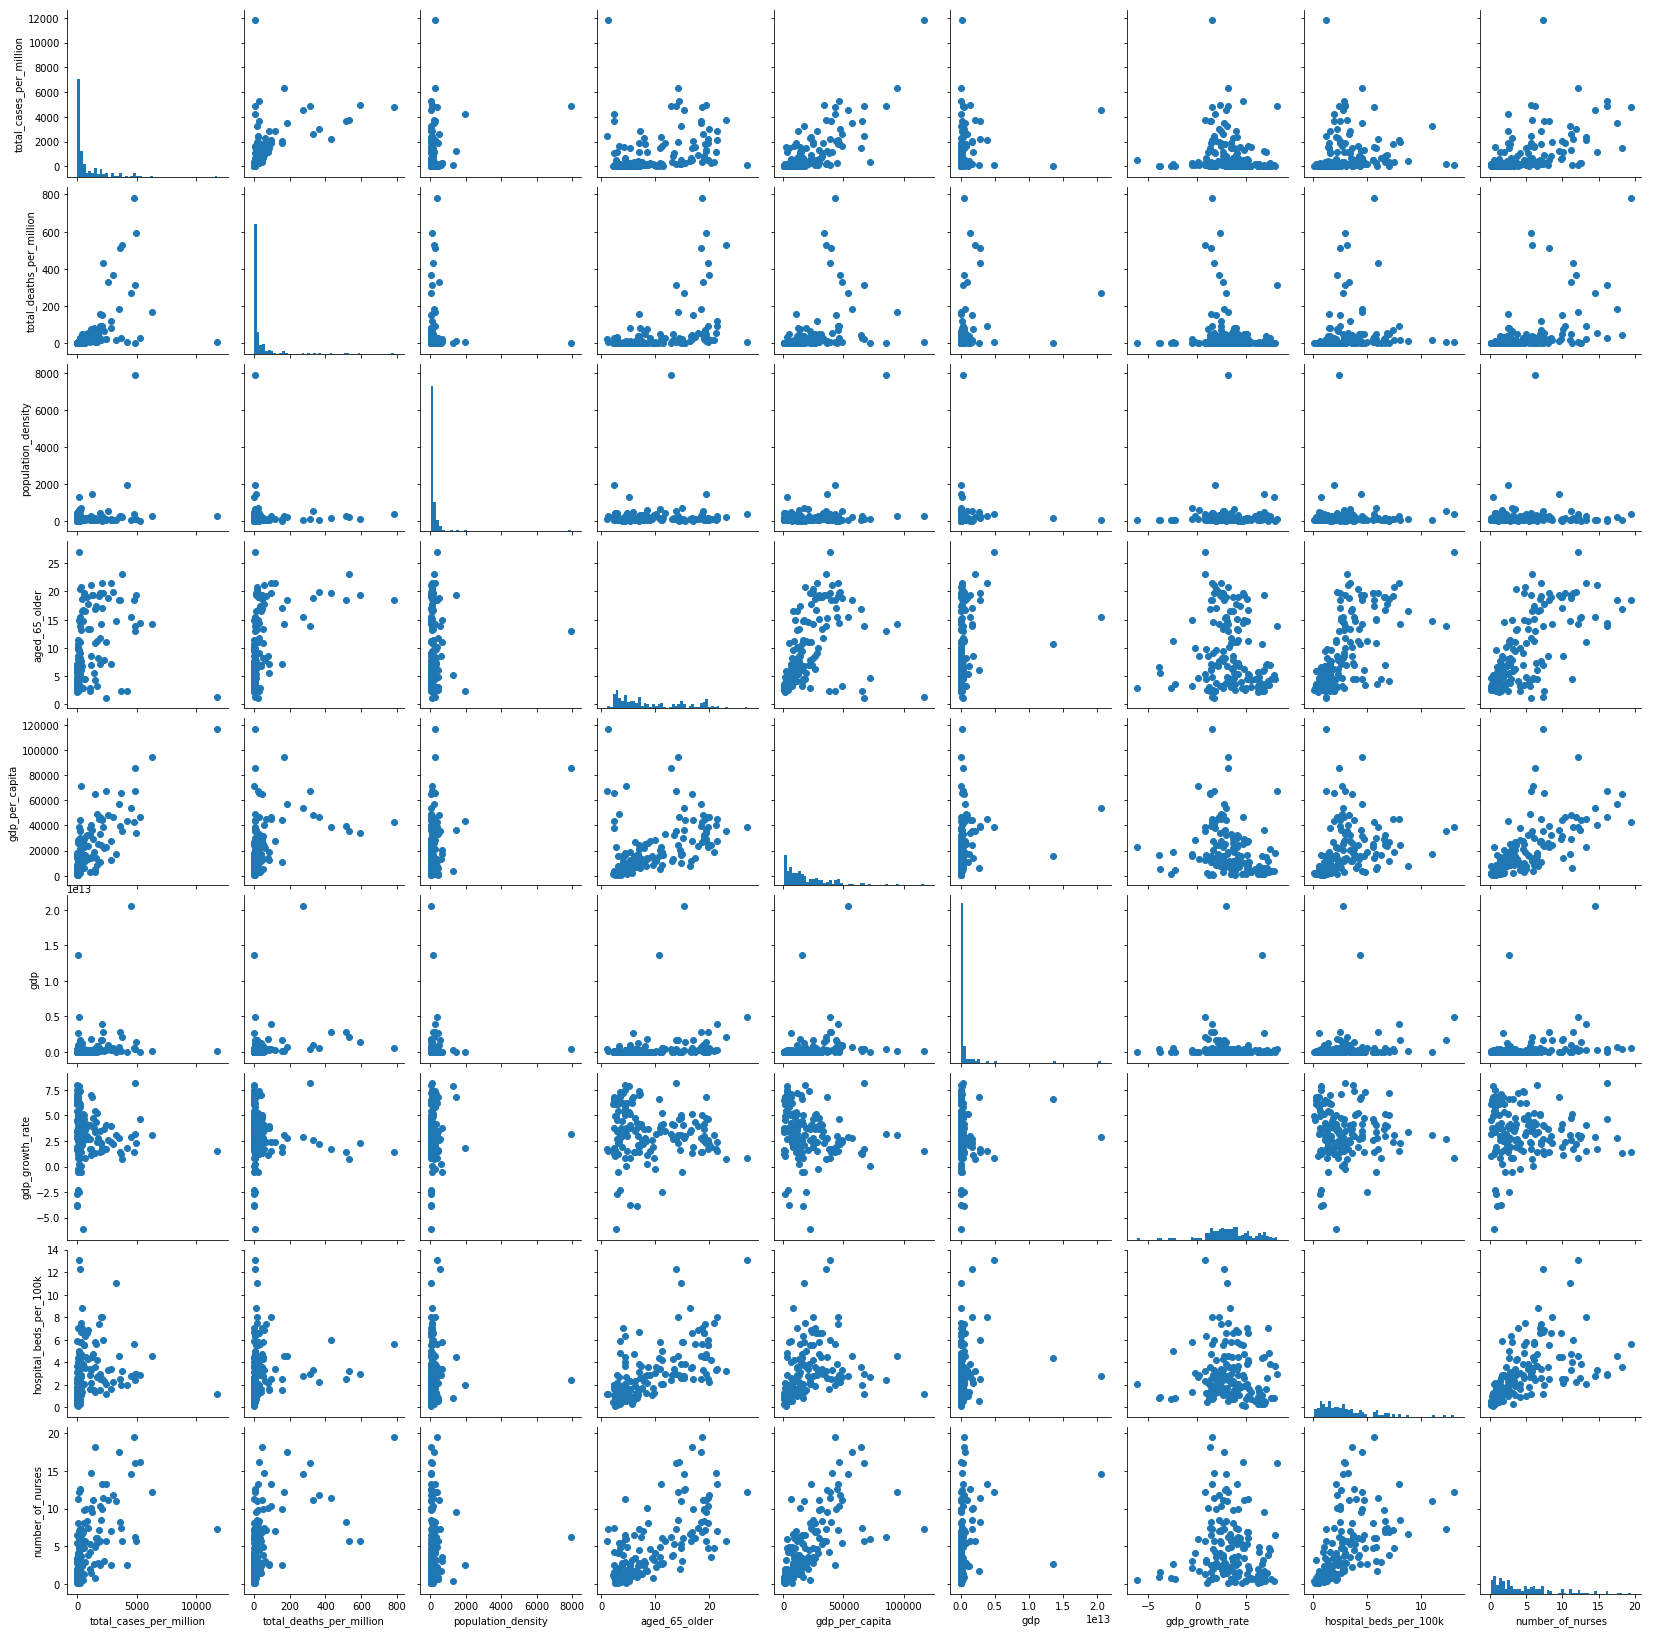

In [25]:
# plot matrix: feature against feature
g = sb.PairGrid(data = country_total, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 50);
g.map_offdiag(plt.scatter)

This plot also confirm the relationship between *gdp_per_capita* and *total_cases_per_million*. Besides that, this original pair plot does not show us much information so let's adapt it a bit by coloring the continents.

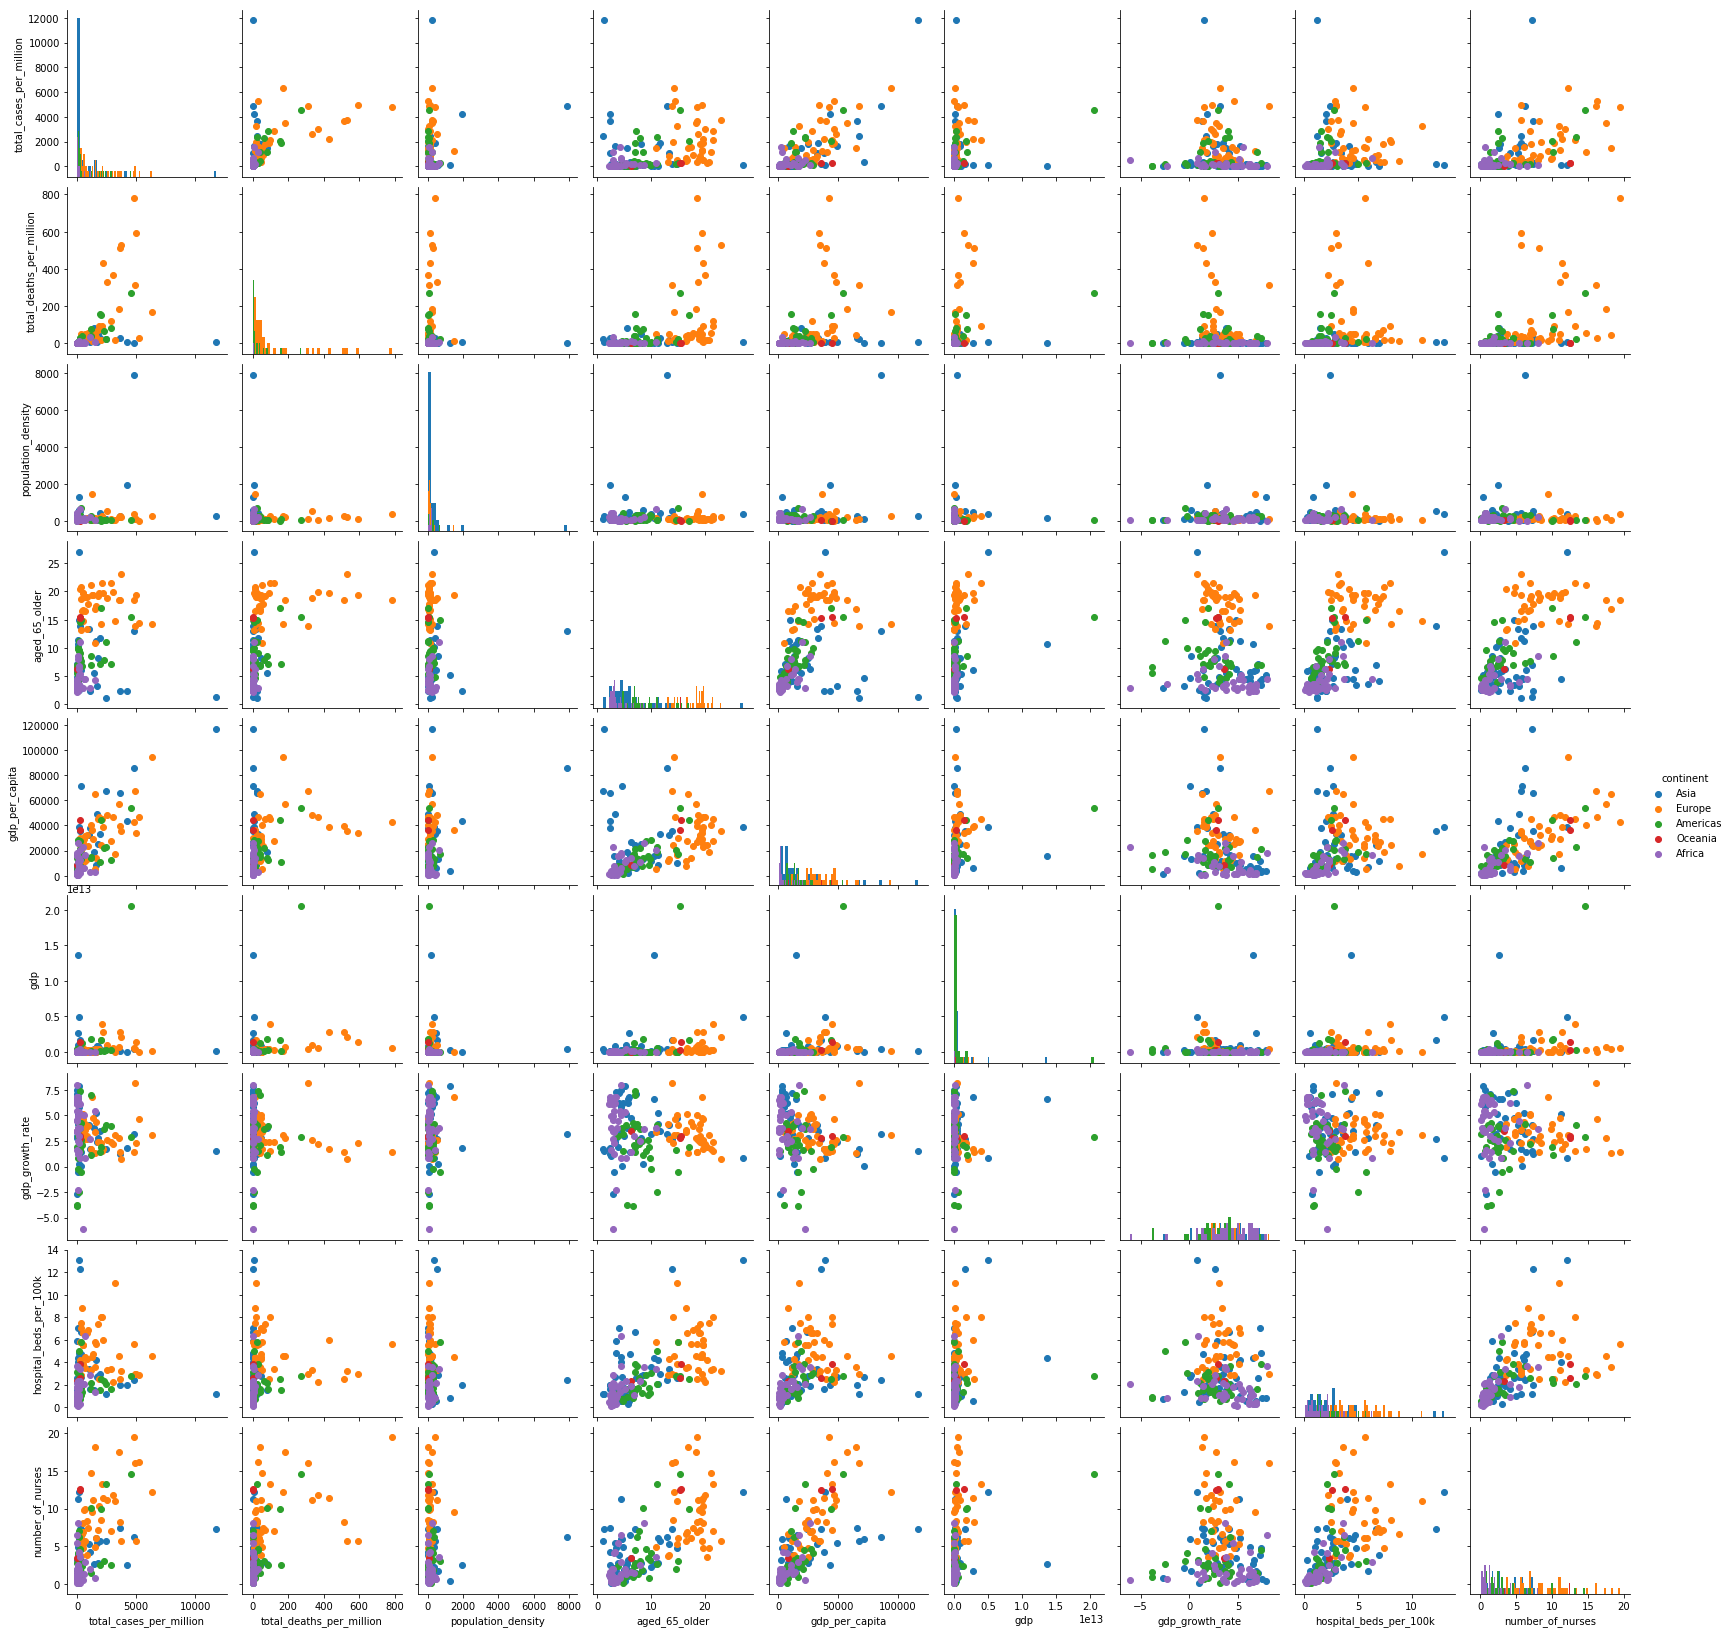

In [26]:
g = sb.PairGrid(data = country_total, vars = numeric_vars,hue='continent')
g = g.map_diag(plt.hist, bins = 50);
g.map_offdiag(plt.scatter)
g = g.add_legend()

This pairplot suggests some very interesting points:
- Countries with little gdp growth rate have more cases per million, especially European countries. This observation is more clear with number of deaths per million. 
- There is strong relation between *total_cases_per_million*,*aged_65_older* and *gdp_per_capita*. Is it related to the statement that most of rich countries are older in population (by the share of aged 65 and older)? We should look for more details between *total_cases_per_million*,*aged_65_older* and *gdp_per_capita*
-  There seems to be no relation between population density and the number of cases per million.

Until now, observations suggest that the behavior of number of cases and number of deaths might vary against continents. We next investigate this approach

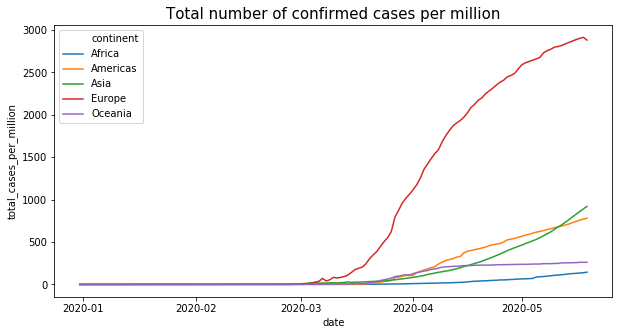

In [27]:
plt.figure(figsize=(10,5))
sb.lineplot(data=continent_ts,x='date',y='total_cases_per_million',hue='continent')
plt.title("Total number of confirmed cases per million",fontsize=15);

For cases per million, europe stands out as much higher than the other continent. And it's not clear how continents behave from the begining of the year till March. It may need a closer look.

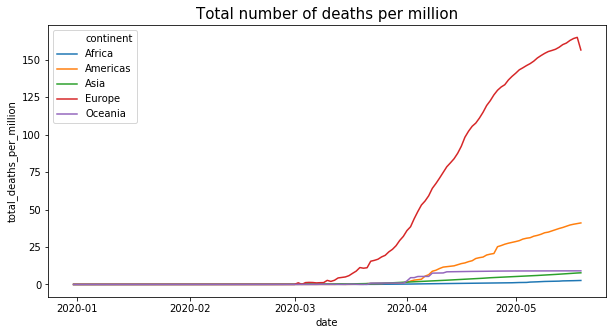

In [28]:
plt.figure(figsize=(10,5))
sb.lineplot(data=continent_ts,x='date',y='total_deaths_per_million',hue='continent')
plt.title("Total number of deaths per million",fontsize=15);

Just as the number of cases per million, europe also stands out for the high of deaths per million. One more interesting observation is that although Americas looks similar to other continents in the cases per million but it has much higher deaths per million. This seems very interesting. We also need a closer look at the period 2002 January - March. 

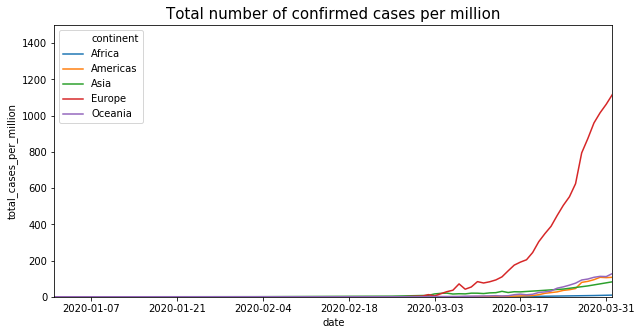

In [29]:
plt.figure(figsize=(10,5))
ax = sb.lineplot(data=continent_ts,x='date',y='total_cases_per_million',hue='continent')
plt.title("Total number of confirmed cases per million",fontsize=15);
ax.set_xlim([pd.Timestamp("2020-01-01"), pd.Timestamp("2020-04-01")])
ax.set_ylim([0,1500]);

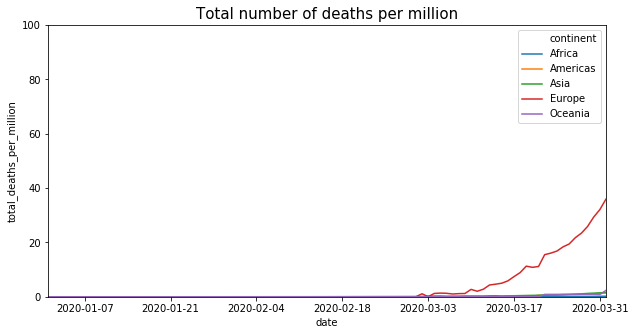

In [30]:
plt.figure(figsize=(10,5))
ax = sb.lineplot(data=continent_ts,x='date',y='total_deaths_per_million',hue='continent')
plt.title("Total number of deaths per million",fontsize=15);
ax.set_xlim([pd.Timestamp("2020-01-01"), pd.Timestamp("2020-04-01")])
ax.set_ylim([0,100]);

So actually, there is no different between continents in the beginning of the pendemic. Europe raised its hand since the beginning of March. So now the questions are:

1. Which features affect the number of cases per million and the number of deaths per million the most?

2. Is higher population density higher the effect of covid 19?

3. Does economics play any role?

Let's investigate the relationship between features of interest, *total_cases_per_million*, *total_deaths_per_million* and *gdp_per_capita*


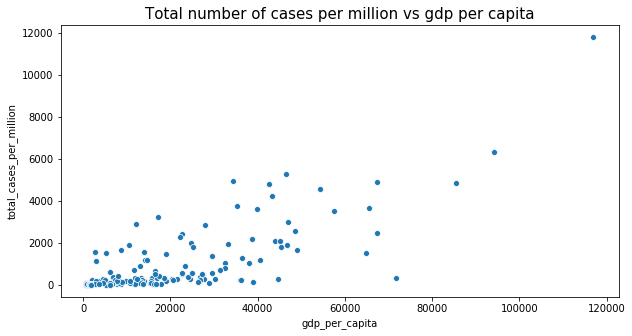

In [31]:
plt.figure(figsize=(10,5))
ax = sb.scatterplot(data=country_total,x='gdp_per_capita',y='total_cases_per_million')
plt.title("Total number of cases per million vs gdp per capita",fontsize=15);


This plot shows an evidence that higher gdp per capita higher the number of cases per million. Since the plot is quite parabolic, let us try to do the square root operation on *total_cases_per_million* to see if it raises the correlation. 

In [32]:
def squareroot_trans(x, inverse = False):
    """ quick function for computing square root and square operations """
    if not inverse:
        return x ** (1/2)
    else:
        return x ** 2

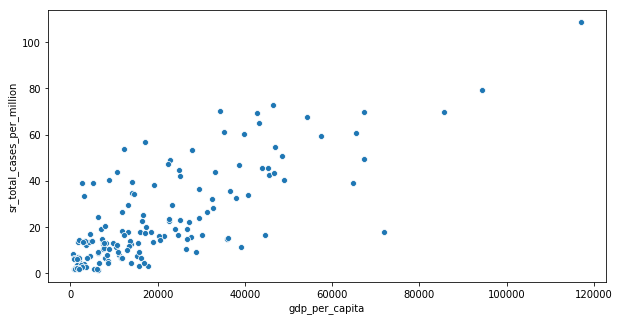

In [33]:
country_total['sr_total_cases_per_million'] = country_total['total_cases_per_million'].apply(squareroot_trans)
plt.figure(figsize=(10,5))
ax = sb.scatterplot(data=country_total,x='gdp_per_capita',y='sr_total_cases_per_million')

The plot looks a bit better but is it really? Let's compute the correlation coefficient between *gdp_per_capita* and *sr_total_cases_per_million*

In [34]:
country_total.gdp_per_capita.corr(country_total.sr_total_cases_per_million)

0.7679654808316312

So the squareroot transformation does not improve the correlation. We move to the next observation about *total_deaths_per_million* to see if it behaves the same.

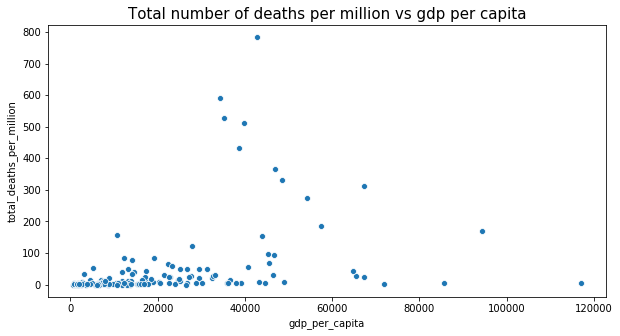

In [35]:
plt.figure(figsize=(10,5))
ax = sb.scatterplot(data=country_total,x='gdp_per_capita',y='total_deaths_per_million')
plt.title("Total number of deaths per million vs gdp per capita",fontsize=15);

This shows that gdp per capita has little effect on the number of deaths per million, except some countries having around 40k per capita with high number of deaths per million. Our guess is that perhaps these countries have older population. We will examine this using *aged_65_older* in multivariate exploration section.

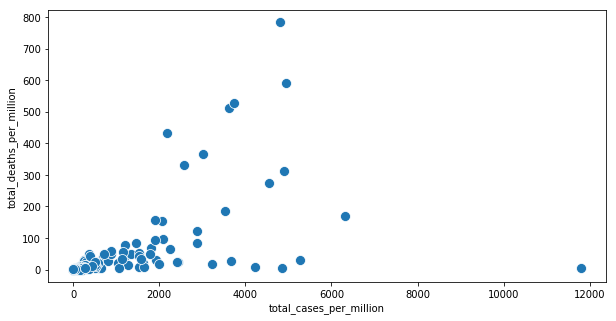

In [36]:
plt.figure(figsize=(10,5))
ax = sb.scatterplot(data=country_total,x='total_cases_per_million',y='total_deaths_per_million',s= 100)

Basically, the number of deaths and number of cases are highly correlated, except some countries that extremely high death rate. Does it also relate to the percentage of aged 65 and older? 

Next, let's have a look at the distribution of *gdp* over continents

<Figure size 720x1800 with 0 Axes>

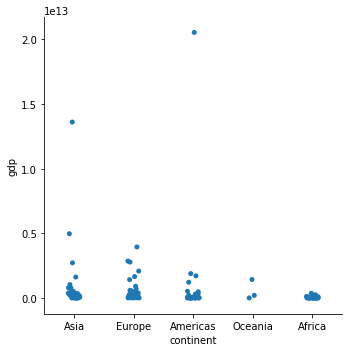

In [37]:
default_color = sb.color_palette()[0]
plt.figure(figsize=(10,25))
sb.catplot(x='continent',y='gdp',data=country_total,color=default_color)

(0, 2000000000000)

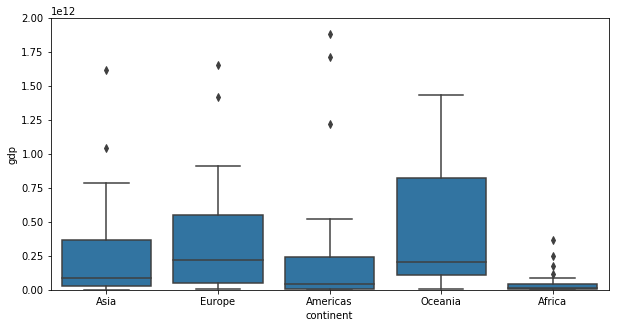

In [38]:
plt.figure(figsize=(10,5))
ax = sb.boxplot(x='continent',y='gdp',data=country_total,color=default_color)
ax.set_ylim([0,2*10**12])

Except Oceania with few countries, Europe seems richer than other continents. But then European countries having enough economic conditions, they still let the pendemic hit hard. It suggests a poor reaction from the governments. Next, we will look at the number of nurses per thousand people to see if having good health system help the country prevent covid19 better.

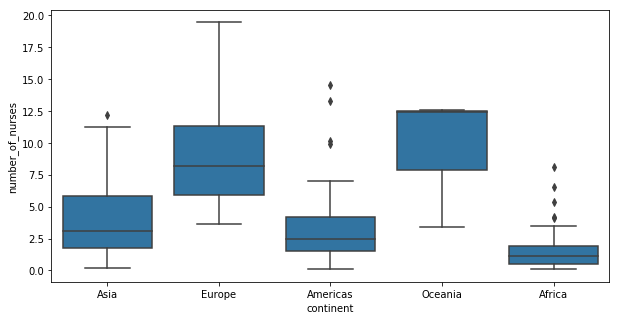

In [39]:
plt.figure(figsize=(10,5))
ax = sb.boxplot(x='continent',y='number_of_nurses',data=country_total,color=default_color)

Again, Europe stands out for having better health system but still fails to prevent covid. The last thing, we will look into is the population density.

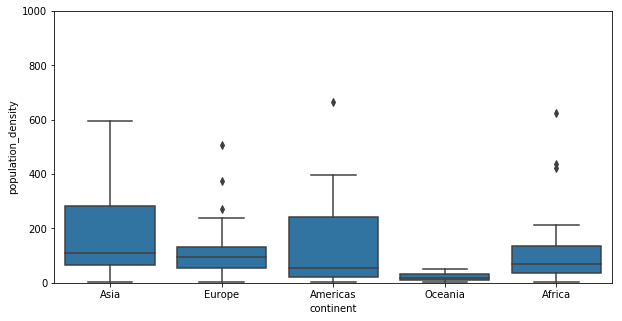

In [40]:
plt.figure(figsize=(10,5))
ax = sb.boxplot(x='continent',y='population_density',data=country_total,color=default_color)
ax.set_ylim([0,1000]);

This plot shows that European countries have less population density than Asian and American but still got hit hard.

Let's see a bit more by plotting violinplot of features of interest against *continent*

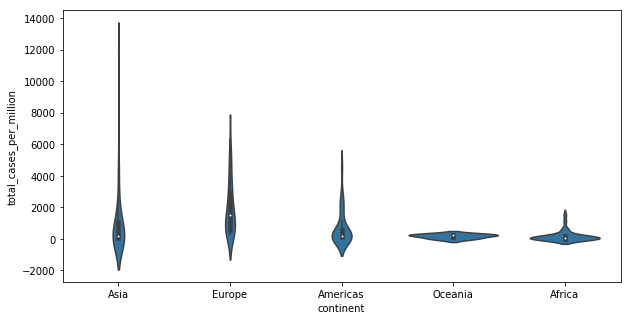

In [41]:
plt.figure(figsize=(10,5))
ax = sb.violinplot(x='continent',y='total_cases_per_million',data=country_total,color = default_color)

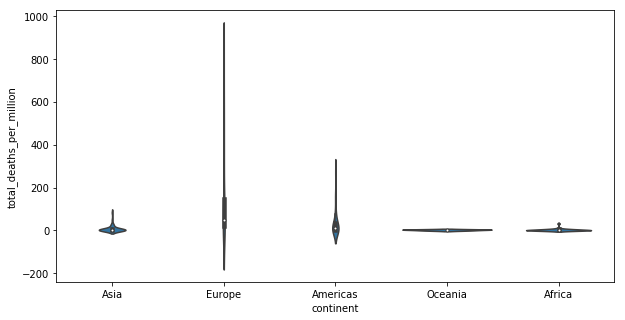

In [42]:
plt.figure(figsize=(10,5))
default_color = sb.color_palette()[0]
ax = sb.violinplot(x='continent',y='total_deaths_per_million',data=country_total,color = default_color)

This does not give us more information. Let's wrap up this section here.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- *total_cases_per_million* and *total_deaths_per_million* vary in different continents. They are increasing very fast in Europe and much slower in other continents.

- At the beginning, all continents seem to behave the same until March Europe stands out.

- We observe that higher gdp per capita higher the number of cases per million. But this might be because the richer countries have more tests so that they found more positive cases. Since we don't have data of the tests in each country, we can't explain this relationship and this is remaining a hypothesis.
- *gdp_per_capita* has little effect on the number of deaths per million, except some european countries having around 40k per capita with high number of deaths per million. We guess that this is because the population ageing. We will investigate this question using *aged_65_older* in the next section.

- *total_cases_per_million* and *total_deaths_per_million* are highly correlated as expected, except for some countries have extremely high death rate. We also guess this happens because of the population ageing and will be investigate next.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- *gdp* vs *continent*:  Europe seems richer than other continents. But then European countries having enough economic conditions, they still let the pendemic hit hard. It suggests a poor reaction from the governments.
- *number_of_nurses* vs *continent*: Europe stands out for having better health system but still fails to prevent covid.

- *population_density* vs *continent*: European countries have less population density than Asian and American but still got hit hard.

## Multivariate Exploration

In this section, we will try to answer the questions we raised in the previous section.

First, we observed that *gdp_per_capita* has little effect on the number of deaths per million, except some countries having around 40k per capita with high number of deaths per million. We guess that this is because the population ageing. We will investigate this question using aged_65_older. Let's see if continent also play a role in this issue

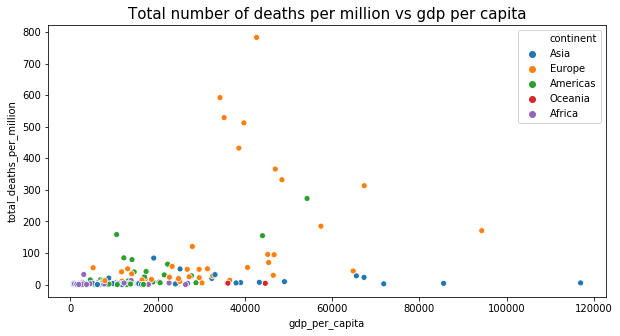

In [43]:
plt.figure(figsize=(10,5))
ax = sb.scatterplot(data=country_total,x='gdp_per_capita',y='total_deaths_per_million',hue='continent')
plt.title("Total number of deaths per million vs gdp per capita",fontsize=15);

This shows that gdp per capita has little effect on the number of deaths per million, except some european countries having around 40k per capita with high number of deaths per million. Our guess is that perhaps these countries have older population. Let's examine this using *aged_65_older*

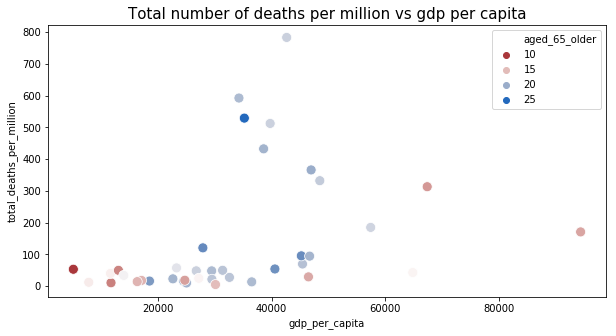

In [44]:
plt.figure(figsize=(10,5))
eu = country_total[country_total.continent=='Europe']
ax = sb.scatterplot(data=eu,x='gdp_per_capita',y='total_deaths_per_million',hue='aged_65_older',palette='vlag_r',s= 100)
plt.title("Total number of deaths per million vs gdp per capita",fontsize=15);

This plot confirms out previous guess that european countries with really high number of deaths per million have older population. 

Next question related to the observation that total_cases_per_million and total_deaths_per_million are highly correlated as expected, except for some countries have extremely high death rate. We guess this happens because of the population ageing and will be investigate next.

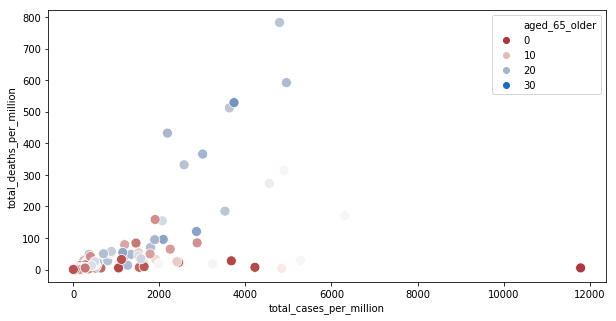

In [45]:
plt.figure(figsize=(10,5))
eu = country_total[country_total.continent=='Europe']
ax = sb.scatterplot(data=country_total,x='total_cases_per_million',y='total_deaths_per_million',hue='aged_65_older',palette='vlag_r',s= 100)

This confirms our statement above, population ageing is a factor that have effect when comparing total cases vs total deaths. In particular, countries with more than 20% of aged 65 and older would get extremely high death rate. This is reasonable because corona virus tends to me more deadly for older people. 

Next, it is reasonable that *hospital_beds_per_100k* and *number_of_nurses* are highly correlated. Now do they enhance each other in term of the relationship between *total_cases_per_million* and *total_deaths_per_million*?

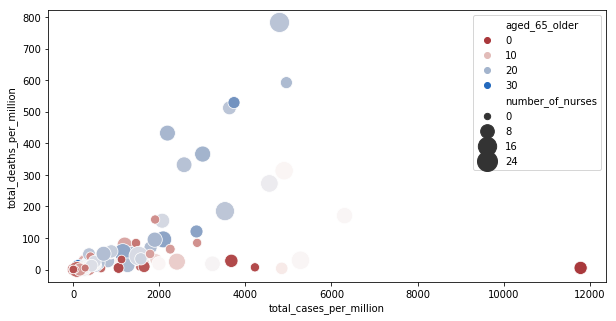

In [46]:
plt.figure(figsize=(10,5))
ax = sb.scatterplot(data=country_total,x='total_cases_per_million',y='total_deaths_per_million',hue='aged_65_older',palette='vlag_r',size= 'number_of_nurses',sizes=(40, 400))

It is very interesting that some countries have high number of nurses per 1k and the proportion of aged 65 or older is not so big (20%) but still have extremely high deaths over cases. Those might sugguest poor policies from the government.

Until now, the feature that we haven't touched is *sub_region*. Let's use it to see we can have any other interesting observation.

In [47]:
sub_regions = country_total.sub_region.unique() 
sub_regions

array(['Southern Asia', 'Southern Europe', 'Western Asia',
       'South America', 'Caribbean', 'Australia and New Zealand',
       'Western Europe', 'Eastern Africa', 'Western Africa',
       'Eastern Europe', 'Central America', 'South-Eastern Asia',
       'Southern Africa', 'Middle Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Northern Africa', 'Melanesia',
       'Central Asia'], dtype=object)

In [48]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

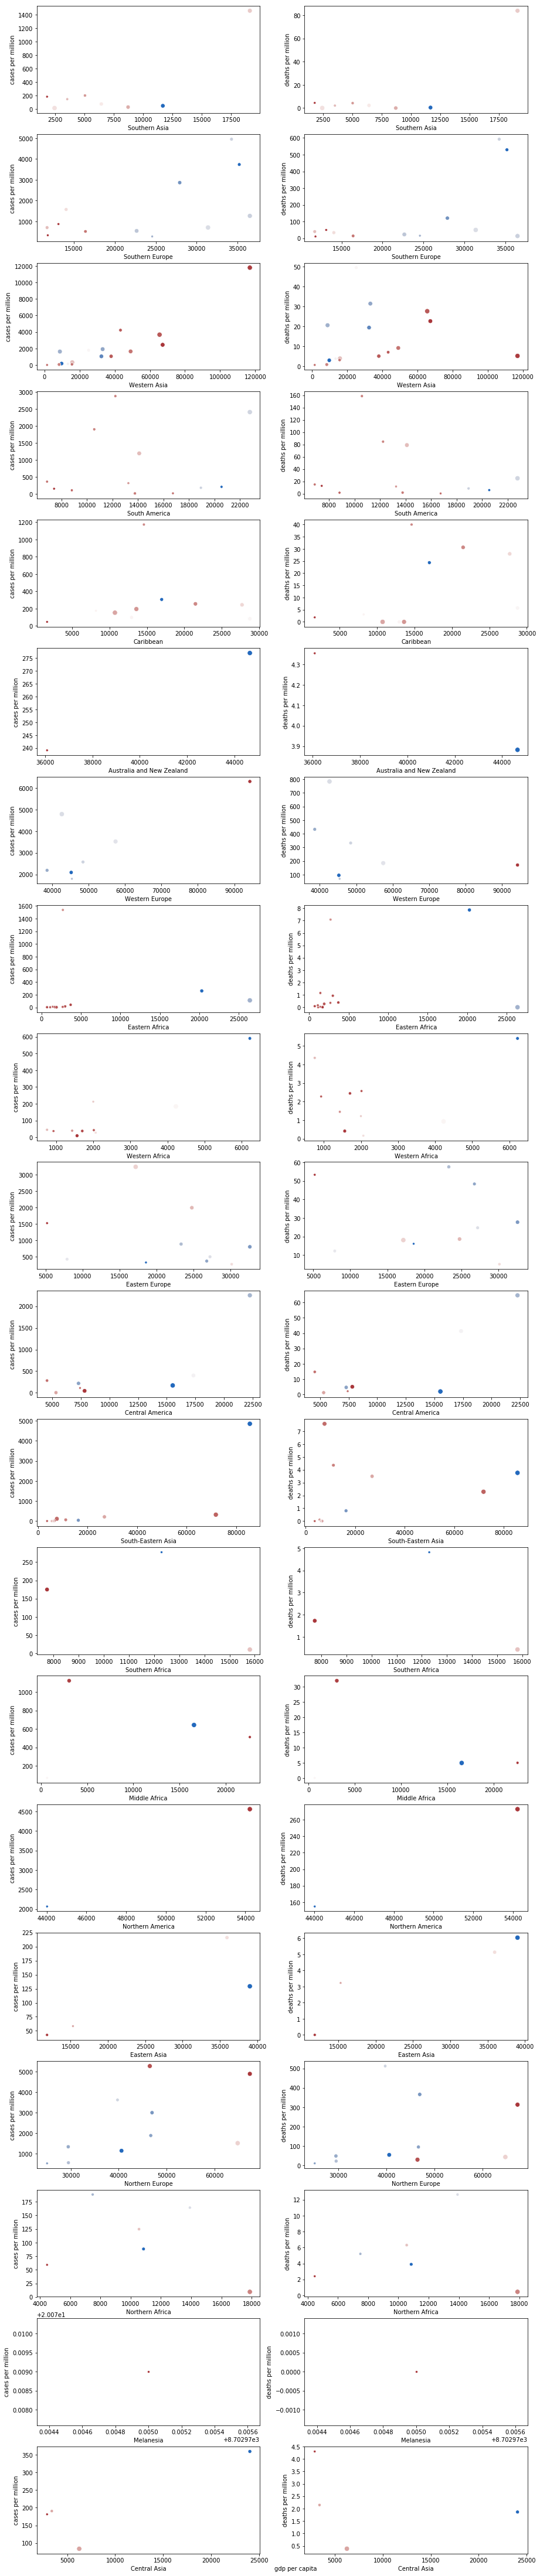

In [49]:

fig, ax = plt.subplots(ncols = 2, nrows = 20 , figsize = [15,80])
for i in range(len(sub_regions)):
    region = sub_regions[i]
    region_df = country_total[country_total.sub_region==region]
    sb.scatterplot(data=region_df,x='gdp_per_capita',
                   y='total_cases_per_million',hue='aged_65_older',
                   palette='vlag_r',size= 'number_of_nurses',ax=ax[i,0])
    ax[i,0].set(xlabel=region,ylabel="cases per million")
    ax[i,0].legend_.remove()
    sb.scatterplot(data=region_df,x='gdp_per_capita',
                   y='total_deaths_per_million',hue='aged_65_older',
                   palette='vlag_r',size= 'number_of_nurses',ax=ax[i,1])
    ax[i,1].set(xlabel=region,ylabel="deaths per million")
    ax[i,1].legend_.remove()
fig.text(0.5,0.12,"gdp per capita",fontsize=10);
plt.show()

There is no interesting observation since the number of countries in each sub-region is quite small and not enough to get any pattern. So we will wrap up this section here.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- *aged_65_older* feature helps us to understand more the relationship between *gdp_per_capita* and *total_cases_per_million*, namely, we observed that gdp per capita has little effect on the number of deaths per million, except some european countries having around 40k per capita with high number of deaths per million. And this happens because those european countries have older population.

- *aged_65_older* feature helps us to understand more the relationship between *total_deaths_per_million* and *total_cases_per_million*, namely, we observed that total_cases_per_million and total_deaths_per_million are highly correlated as expected, except for some countries have extremely high death rate. And this happens because those european countries have older population.

### Were there any interesting or surprising interactions between features?

- One very interesting observation is that  some countries have high number of nurses per 1k and the proportion of aged 65 or older is not so big (20%) but still have extremely high deaths over cases. Those might sugguest poor policies from the government.